# Dependency package import

In [4]:
from pycaret.classification import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
import matplotlib

# AP-XGBoost

In [5]:
df_train = pd.read_csv('../dataset/AtomPair_880.csv')
df_train.iloc[:,1:] = df_train.iloc[:,1:].astype(float)
df_train['Label'] = df_train['Label'].str.replace('TICT','1')
df_train['Label'] = df_train['Label'].str.replace('PICT','0')
features_train = df_train.iloc[:,1:]
features_train_ = list(features_train)
features_train = df_train.iloc[:,1:]
features_train_ = list(features_train)
df_train['Label'] = df_train['Label'].astype(int)

In [6]:
exp = setup(df_train,target='Label',train_size=0.8,numeric_features=features_train_,preprocess = False,silent=True,session_id=801,verbose=0)

In [7]:
xgboost = create_model('xgboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7447,0.8097,0.8395,0.7473,0.7907,0.4662,0.4715
1,0.7305,0.7014,0.8148,0.7416,0.7765,0.4391,0.4422
2,0.7376,0.7663,0.8148,0.7500,0.7811,0.4550,0.4575
3,0.6809,0.6979,0.7901,0.6957,0.7399,0.3313,0.3358
4,0.7143,0.7880,0.7531,0.7531,0.7531,0.4141,0.4141
Mean,0.7216,0.7527,0.8025,0.7375,0.7682,0.4212,0.4242
Std,0.0227,0.0454,0.0292,0.0213,0.0188,0.0482,0.0481


In [8]:
test_prediction = predict_model(xgboost,raw_score=True)
# test_prediction.to_csv('AtomPairfinal_model_test.csv')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7841,0.8460,0.7925,0.8400,0.8155,0.5558,0.5572


In [9]:
X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

In [10]:
final_model = finalize_model(xgboost)
# save_model(final_model, 'AtomPairfinal_model')

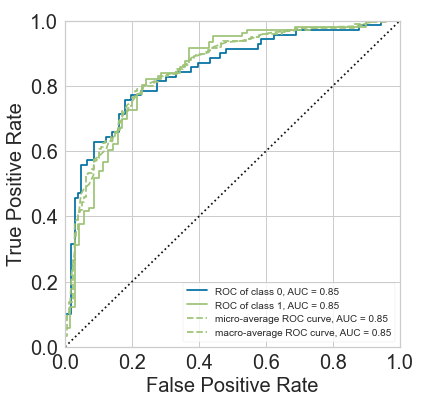

In [11]:
plt.figure(figsize=(6,6))
plt.xticks(fontfamily = 'Arial', fontsize=20)
plt.yticks(fontfamily = 'Arial', fontsize=20)
plt.xlabel(' ', fontfamily = 'Arial', fontsize=20)
plt.ylabel(' ', fontfamily = 'Arial', fontsize=20)
matplotlib.rc('font', family='Arial', weight='normal', size=16)
visualizer = ROCAUC(xgboost, title=' ')
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()            # Draw/show/poof the data
# g.get_figure().savefig('AtomPair_ROCAUC.tiff',dpi=600)

# 2D+3D descriptors-CatBoost

In [12]:
df_train = pd.read_csv('../dataset/AM1_863.csv')
data_RFE = pd.read_csv('../dataset/AM1_RFE_ignore.csv')

In [13]:
rfe_ignore = list(data_RFE.columns)

In [14]:
df_train.iloc[:,1:] = df_train.iloc[:,1:].astype(float)
df_train['Label'] = df_train['Label'].str.replace('TICT','1')
df_train['Label'] = df_train['Label'].str.replace('PICT','0')
features_train = df_train.iloc[:,1:]
features_train_ = list(features_train)
features_train = df_train.iloc[:,1:]
features_train_ = list(features_train)
df_train['Label'] = df_train['Label'].astype(int)

In [15]:
exp = setup(df_train,target='Label',train_size=0.8,numeric_features=features_train_,ignore_features=rfe_ignore,
            silent = True,preprocess = False,session_id=8535,verbose=0)

In [16]:
cat = create_model('catboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.7174,0.7736,0.7632,0.7342,0.7484,0.4263,0.4268
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.7101,0.7666,0.8267,0.6966,0.7561,0.4053,0.4144
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.2855,0.3080,0.3180,0.2862,0.3009,0.1663,0.1682
Std,0.3497,0.3773,0.3899,0.3507,0.3685,0.2038,0.2061


In [17]:
test_prediction = predict_model(cat,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7399,0.7633,0.8218,0.7545,0.7867,0.4549,0.4577


In [18]:
df_fi = pd.DataFrame({'importance':cat.feature_importances_,'feature':list(features_train.drop(rfe_ignore,1))})
df_fi.sort_values('importance',ascending=False)

,importance,feature
61,3.380277,GCUT_SLOGP_0
33,3.102590,vsurf_CW2
93,2.737365,SlogP_VSA0
85,2.388271,Q_VSA_HYD
94,1.878880,SlogP_VSA5
...,...,...
42,0.408488,vsurf_HB3
1,0.403933,AM1_HF
20,0.390981,FCASA+
35,0.386775,vsurf_D3


In [19]:
explainer = shap.Explainer(cat)
shap_values = explainer.shap_values(test_prediction.iloc[:,:104])

In [20]:
shap_df = pd.DataFrame(shap_values)
shap_list = []
for i in list(range(0,104,1)):
#     print(i)
    influ = sum(np.abs(shap_df.iloc[:,i]))
    shap_list.append(influ)
df_shap = pd.DataFrame({'shap':shap_list,'feature':list(features_train.drop(rfe_ignore,1))})
df_shap.sort_values('shap',ascending=False)

,shap,feature
61,35.377820,GCUT_SLOGP_0
33,26.581532,vsurf_CW2
85,24.348574,Q_VSA_HYD
93,21.296454,SlogP_VSA0
37,16.014282,vsurf_DD23
...,...,...
42,1.351186,vsurf_HB3
51,1.289317,vsurf_IW4
16,1.282517,E_ele
35,1.217652,vsurf_D3


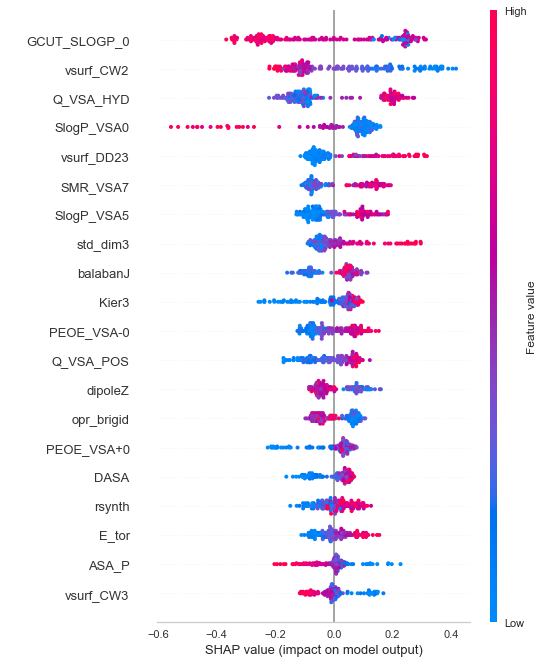

In [21]:
plt.xticks(fontfamily = 'Arial', fontsize=16)
plt.yticks(fontfamily = 'Arial', fontsize=16)
plt.xlabel(' ', fontfamily = 'Arial', fontsize=16)
plt.ylabel(' ', fontfamily = 'Arial', fontsize=16)

fig = plt.gcf()
plt.grid()
shap.summary_plot(shap_values, test_prediction.iloc[:,:104], max_display=20)
# fig.savefig('AM1_SHAP1.jpg',dpi=600,bbox_inches='tight')
plt.show()

# MACCS-CatBoost

In [22]:
df_train = pd.read_csv('../dataset/MACCS_880.csv')
df_train.iloc[:,1:] = df_train.iloc[:,1:].astype(float)
df_train['Label'] = df_train['Label'].str.replace('TICT','1')
df_train['Label'] = df_train['Label'].str.replace('PICT','0')
features_train = df_train.iloc[:,1:]
features_train_ = list(features_train)
features_train = df_train.iloc[:,1:]
features_train_ = list(features_train)
df_train['Label'] = df_train['Label'].astype(int)

In [23]:
exp = setup(df_train,target='Label',train_size=0.8,numeric_features=features_train_,
            silent = True,preprocess = False,session_id=2290,verbose=0)

In [24]:
cat = create_model('catboost',fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7021,0.7574,0.8148,0.7097,0.7586,0.3745,0.3807
1,0.7447,0.7552,0.8272,0.7528,0.7882,0.4686,0.4719
2,0.6879,0.7311,0.7654,0.7126,0.7381,0.3533,0.3547
3,0.7447,0.8045,0.8659,0.7396,0.7978,0.4573,0.4679
4,0.6857,0.7171,0.8025,0.6989,0.7471,0.3372,0.3429
Mean,0.7130,0.7531,0.8151,0.7227,0.7660,0.3982,0.4036
Std,0.0264,0.0298,0.0327,0.0201,0.0232,0.0543,0.0555


In [25]:
test_prediction = predict_model(cat,raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7330,0.7567,0.8286,0.7500,0.7873,0.4309,0.4348


In [26]:
df_fi = pd.DataFrame({'importance':cat.feature_importances_,'feature':list(features_train)})
df_fi.sort_values('importance',ascending=False)

,importance,feature
150,4.090060,MACCS150
154,3.992201,MACCS154
139,2.813700,MACCS139
133,2.641112,MACCS133
164,2.458627,MACCS164
...,...,...
6,0.000000,MACCS6
5,0.000000,MACCS5
4,0.000000,MACCS4
2,0.000000,MACCS2


In [27]:
explainer = shap.Explainer(cat,)
shap_values = explainer.shap_values(test_prediction.iloc[:,:167])
shap_df = pd.DataFrame(shap_values)
shap_list = []
for i in list(range(0,167,1)):
#     print(i)
    influ = sum(np.abs(shap_df.iloc[:,i]))
    shap_list.append(influ)
df_shap = pd.DataFrame({'shap':shap_list,'feature':list(features_train)})
df_shap.sort_values('shap',ascending=False)

,shap,feature
150,38.039387,MACCS150
154,33.028072,MACCS154
139,25.902226,MACCS139
133,20.555394,MACCS133
164,19.524020,MACCS164
...,...,...
6,0.000000,MACCS6
5,0.000000,MACCS5
4,0.000000,MACCS4
2,0.000000,MACCS2


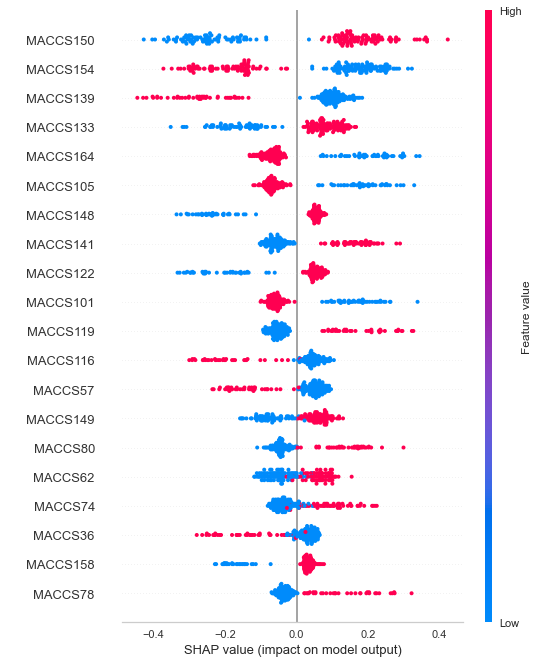

In [28]:
plt.xticks(fontfamily = 'Arial', fontsize=16)
plt.yticks(fontfamily = 'Arial', fontsize=16)
plt.xlabel(' ', fontfamily = 'Arial', fontsize=16)
plt.ylabel(' ', fontfamily = 'Arial', fontsize=16)

fig = plt.gcf()
plt.grid()
shap.summary_plot(shap_values, test_prediction.iloc[:,:167], max_display=20)
# fig.savefig('MACCS_SHAP2.jpg',dpi=600,bbox_inches='tight')
plt.show()